### Recognizing High-redshift Galaxy Mergers with Convolutional Neural Networks using DeepMerge simulated data with an application on real-world data
# Architectures

*Ema Donev, 2023.*

In this notebook you will find all the informatio necessary to understand the reference architecture and the process of forming my own architecture in reference to *DeepMerge: Classifying High-redshift Merging Galaxies with Deep Neural Networks by Ćiprijanović A., Snyder G.F., Nord B. and Peek J. E. G., 2020.*

In [1]:
import os
import numpy as np
import time
import sys

import matplotlib.pyplot as plt

import torch
import torch.nn as nn

I am importing my own files which contain all of the code for the necessary inputs, functions and the processing of the simulated data in order to test different architectures.

In [3]:
sys.path.insert(0,'../src/')
import simdata

In [4]:
import functions

## Section 1: Importing data

In [6]:
train_dl_pr, valid_dl_pr, test_dl_pr = simdata.pristine_data(64)
train_dl_no, valid_dl_no, test_dl_no = simdata.noisy_data(64)

## Section 2: Reference architecture

The reference architecture is taken from *DeepMerge: Classifying High-redshift Merging Galaxies with Deep Neural Networks by Ćiprijanović A., Snyder G.F., Nord B. and Peek J. E. G., 2020.* Figure 1 shows the architecture in visual form.

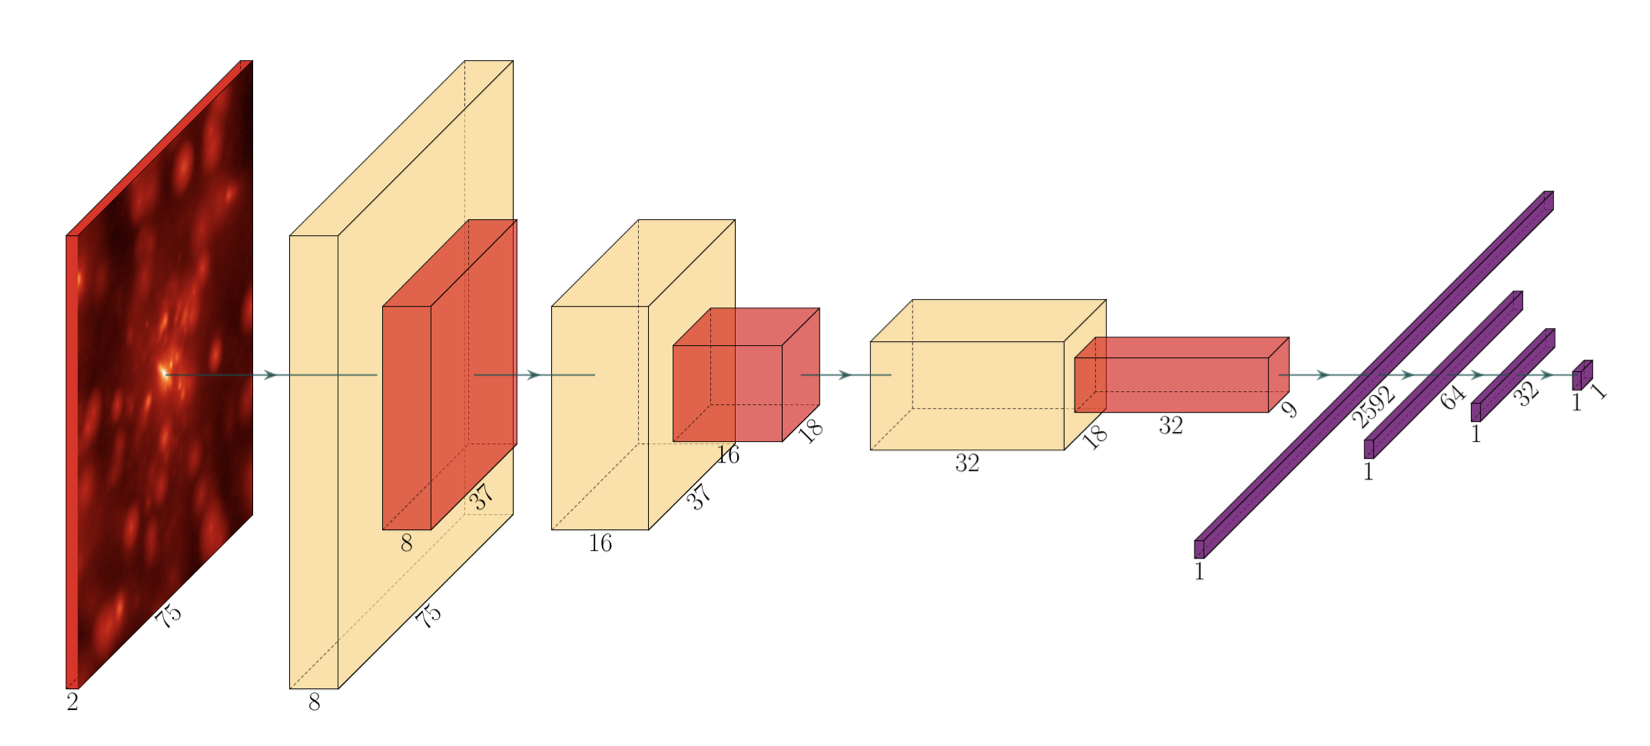

In [7]:
from IPython.display import Image
Image(filename="../images/reference.png")

*Figure 1: reference architecture of DEEPMERGE*

The reference architecture originally takes in images with 2 filters or layers, while this research paper focuses on 3 layered images. After the model inputs the image, `convolution` with ReLU as the activation function and a kernel size of first 5x5 and later of 3x3, changes the dimensions to 8x75x75, then we use `batch normalization`, and finally `max-pooling` halves the dimensions into 8x37x37. This process is repeated in total of 3 times, where in between each convolutional layer we have a `Dropout` function with a threshold of 0.5. After that, we `Flatten` the convolutional layer into a linear layer, and then we create 3 more `Linear layers` which lead to a final prediction of the image's label.

## Section 3: building my own architecture